# Análisis exploratorio de incidencia delictiva en México

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('data/delitos.csv')

#### Ejercicio 1: Elige 3 estados de la república y grafica una serie de tiempo de la frecuencia abosluta de homicidios dolosos de enero 2015 a julio 2019 en estas tres entidades

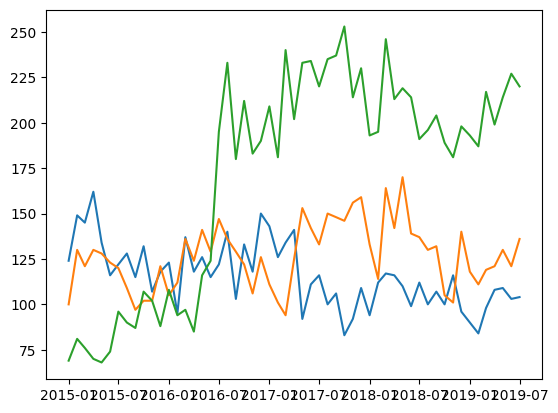

In [40]:
df_estados = df[df['entidad'].isin(['Veracruz de Ignacio de la Llave', 'Chiapas', 'Tamaulipas'])]
df_homicidios = df_estados[df_estados['tipo_de_delito'] == 'Homicidio'].copy()
df_homicidios['fecha'] = pd.to_datetime(df_homicidios['fecha'])

inicio = '2015-01-01'
fin = '2019-07-31'
df_homicidios = df_homicidios[(df_homicidios['fecha'] >= inicio) & (df_homicidios['fecha'] <= fin)]

df_grouped = df_homicidios.groupby(['fecha', 'entidad'])['frecuencia'].sum().reset_index()

for entidad in df_grouped['entidad'].unique():
    df_plot = df_grouped[df_grouped['entidad'] == entidad]
    plt.plot(df_plot['fecha'], df_plot['frecuencia'], label=entidad)

    

#### Ejercicio 2: Contetas las siguientes  preguntas:
1. ¿Cuántos homicidios dolosos hubo en Colima en el 2018?
2. ¿Cuantos robos de vehículo automotor ha habido en el 2019?
3. Obten la suma de homicidos dolosos y feminidios en toda la República Mexicana en cada año.
4. ¿En qué mes y en qué municipio ha ocurrido el mayor número de feminicidios?
5. ¿En qué año y en qué estado ha ocurrido el mayor número de feminicidios?

In [70]:
respuesta1 = df.loc[(df['entidad'] == 'Colima') & (df['anio'] == 2018), 'frecuencia'].sum()
print('1: ', respuesta1)
respuesta2 = df.loc[(df['tipo_de_delito'] == 'Robo') & (df['anio'] == 2019), 'frecuencia'].sum()
print('2: ', respuesta2)
#respuesta 3
print(f'3:')
for anio in df['anio'].unique():
    df_homicidios_feminicidios = df[(df['tipo_de_delito'].isin(['Homicidio', 'Feminicidio'])) & (df['anio'] == anio)]
    respuesta3 = df_homicidios_feminicidios['frecuencia'].sum()
    print(f'{anio}: {respuesta3}')
print ('---')
#respuesta 4
df_fem = df[df['tipo_de_delito'] == 'Feminicidio']
fila_max = df_fem.loc[df_fem['frecuencia'].idxmax()]
print(f"4: Mes: {fila_max['nombre_mes']}, Municipio: {fila_max['entidad']}, Frecuencia: {fila_max['frecuencia']}")
#respuesta 5
print(f"5: año: {fila_max['anio']}, Estado: {fila_max['entidad']}")


1:  24494.0
2:  766096.0
3:
2015: 31744.0
2016: 36018.0
2017: 42068.0
2018: 45385.0
2019: 45822.0
2020: 44223.0
2021: 44960.0
2022: 43845.0
2023: 42846.0
2024: 22307.0
---
4: Mes: julio, Municipio: México, Frecuencia: 19.0
5: año: 2020, Estado: México


#### Ejercicio 3: Haz una gráfica de pastel de tipos de delito. Deberás crear una gráfica para cada año. Utilzia la función subplots de matplotlib

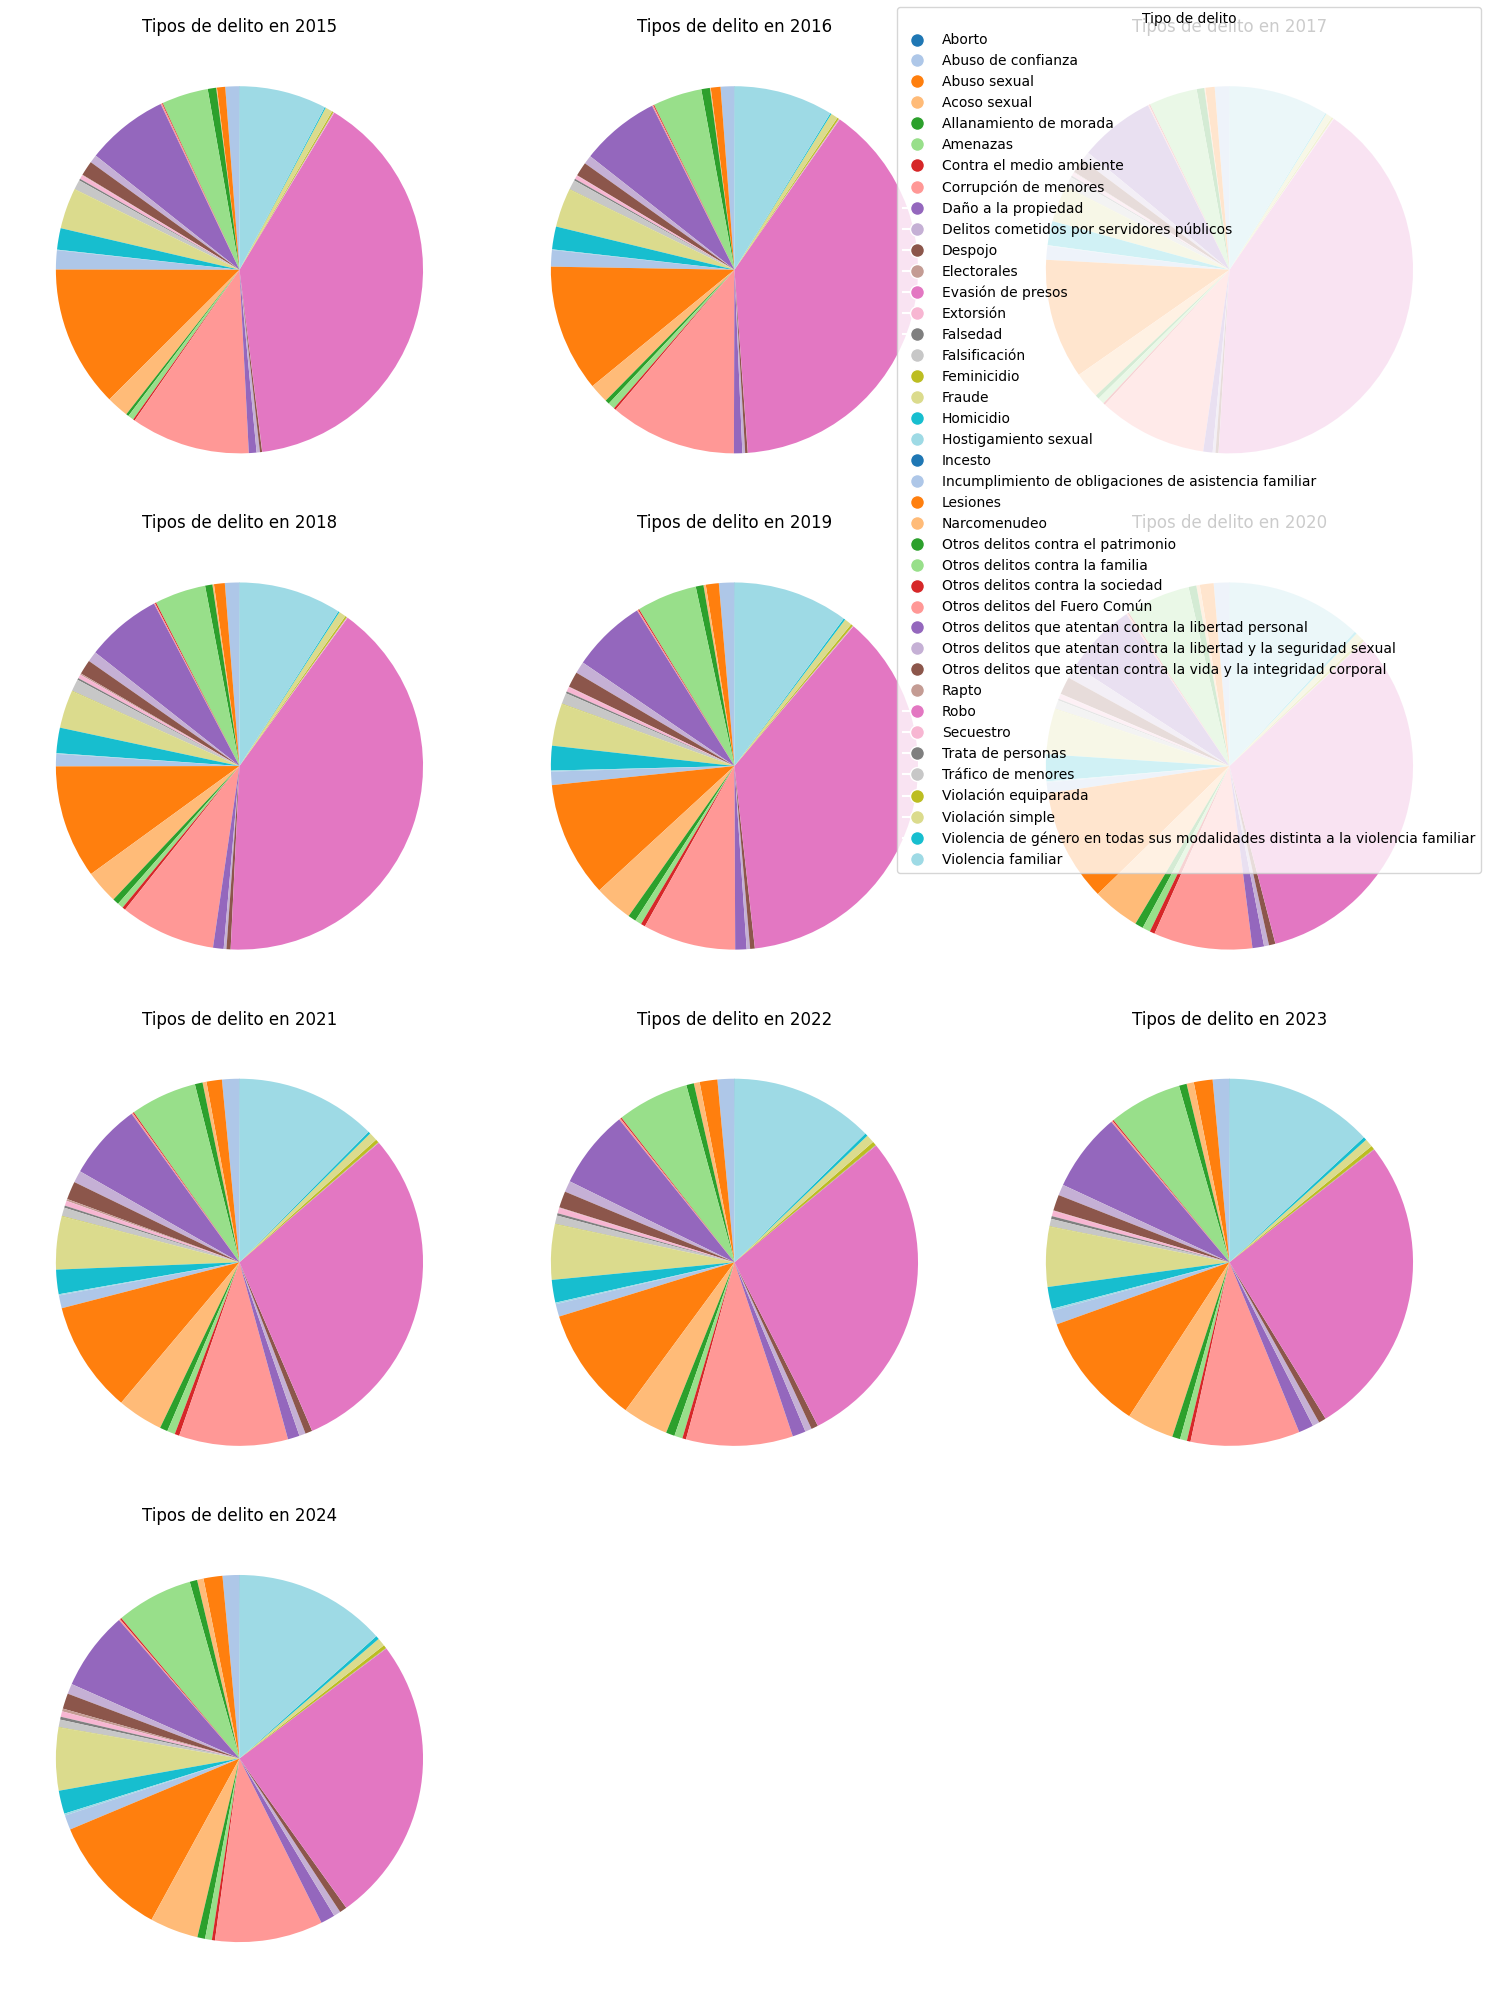

In [79]:
tipos = list(df['tipo_de_delito'].unique())
colores = plt.cm.tab20.colors
color_map = {tipo: colores[i % len(colores)] for i, tipo in enumerate(tipos)}

anios = sorted(df['anio'].unique())
ncols = 3
nrows = (len(anios) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 5*nrows))
axes = np.atleast_1d(axes).flatten()

for i, anio in enumerate(anios):
    df_anio = df[df['anio'] == anio]
    df_tipo = df_anio.groupby('tipo_de_delito')['frecuencia'].sum()
    axes[i].pie(df_tipo, labels=None, colors=[color_map[t] for t in df_tipo.index], startangle=90)
    axes[i].set_title(f'Tipos de delito en {anio}')

fig.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[t], markersize=10) 
                    for t in tipos],
           labels=tipos, loc='upper right', title='Tipo de delito')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


---
#### Calcula la tasa por 100,000 habitantes
##### Tasa por 100,000 habitantes
Mostrar el total de delitos en una entidad no nos sirve de mucho. Es mucho más útil calcular la tasa de incidencia delictiva por cada 100,000 habitantes

$$
tasa = \frac{delitos\space totales}{población} \times 100,000
$$

Esta tasa la podemos anualizar multiplicándola por un factor de 12
$$
tasa\space anualizada = tasa \times 12
$$

Población por entidad federativa según [la encuesta intercensal 2015](https://www.inegi.org.mx/programas/intercensal/2015/)

No tienes que descargar nada. Ya están los datos en la carpeta data

In [81]:
pobs = pd.read_csv('data/poblacion_entidades_2015.csv', encoding='iso-8859-1', sep=";")
pobs = pobs[['Cve_Entidad', 'Entidad', 'Poblacion']]
pobs = pobs.rename(columns={'Cve_Entidad':'clave_entidad', 'Entidad':'entidad', 'Poblacion':'poblacion'})
pobs.head()

,clave_entidad,entidad,poblacion
0,1,Aguascalientes,1312544.0
1,2,Baja California,3315766.0
2,3,Baja California Sur,712029.0
3,4,Campeche,899931.0
4,5,Coahuila de Zaragoza,5217908.0


In [89]:
tasa = df['frecuencia'].sum() / pobs['poblacion'].sum() * 100000
print('tasa:', tasa)
tasa_actualizada = tasa * 12
print('tasa_actualizada:', tasa_actualizada)

tasa: 15640.231096009242
tasa_actualizada: 187682.7731521109
